# Imports
Importing the modules and loading data from csv.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
import json
import requests
import plotly.graph_objects as go

In [2]:
company_summary_2020 = pd.read_csv('data/company_summary_2020.csv')
company_summary_2019 = pd.read_csv('data/company_summary_2019.csv')

# Checking types and converting datatypes as necessary

In [3]:
company_summary_2019.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108069 entries, 0 to 108068
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   GEO_ID            108069 non-null  object
 1   NAME              108069 non-null  object
 2   NAICS2017         108069 non-null  object
 3   NAICS2017_LABEL   108069 non-null  object
 4   SEX               108069 non-null  int64 
 5   SEX_LABEL         108069 non-null  object
 6   RACE_GROUP        108069 non-null  int64 
 7   RACE_GROUP_LABEL  108069 non-null  object
 8   VET_GROUP         108069 non-null  int64 
 9   VET_GROUP_LABEL   108069 non-null  object
 10  FIRMPDEMP         108069 non-null  int64 
 11  EMP               108069 non-null  int64 
 12  PAYANN            108069 non-null  int64 
 13  state             108069 non-null  int64 
dtypes: int64(7), object(7)
memory usage: 12.4+ MB


In [4]:
company_summary_2020[['FIRMPDEMP', 'PAYANN', 'EMP']] = company_summary_2020[['FIRMPDEMP', 'PAYANN', 'EMP']].astype('int64')
company_summary_2019[['FIRMPDEMP', 'PAYANN', 'EMP']] = company_summary_2019[['FIRMPDEMP', 'PAYANN', 'EMP']].astype('int64')

# Filtering
1. Filtered data to include all sectors and grouping by gender. Filtering will remove duplicated data.
2. New filter for total firms by state and group state and gender. Converted State names to abbreviations.

In [5]:
gender_ratio_2020 = company_summary_2020[(company_summary_2020['NAICS2017_LABEL'] == 'Total for all sectors') & (company_summary_2020['SEX_LABEL'] != 'Total')]

In [6]:
gender_ratio_2020 = gender_ratio_2020[['SEX_LABEL', 'FIRMPDEMP']].groupby('SEX_LABEL').sum()

In [7]:
gender_ratio_2019 = company_summary_2019[(company_summary_2019['NAICS2017_LABEL'] == 'Total for all sectors') & (company_summary_2019['SEX_LABEL'] != 'Total')]

In [8]:
gender_ratio_2019 = gender_ratio_2019[['SEX_LABEL', 'FIRMPDEMP']].groupby('SEX_LABEL').sum()

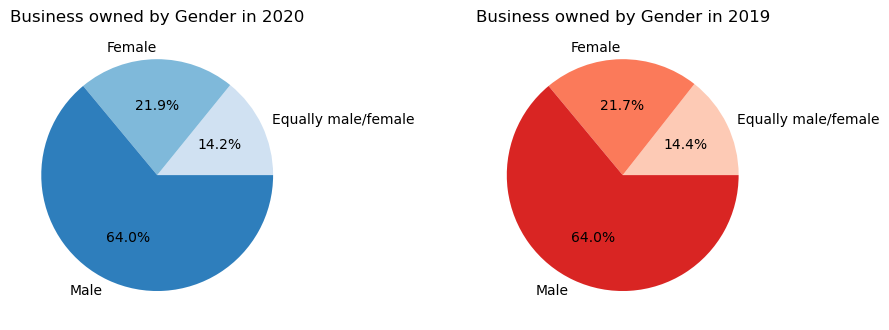

In [9]:
colors = plt.get_cmap('Blues')(np.linspace(0.2, 0.7, len(gender_ratio_2020)))
colors_2019 = plt.get_cmap('Reds')(np.linspace(0.2, 0.7, len(gender_ratio_2019)))
fig, ax = plt.subplots(1,2, figsize = (10,10))
ax[0].pie(gender_ratio_2020.FIRMPDEMP, labels= gender_ratio_2020.index, colors=colors, autopct='%1.1f%%')
ax[0].set_title('Business owned by Gender in 2020')
ax[1].pie(gender_ratio_2019.FIRMPDEMP, labels= gender_ratio_2019.index, colors=colors_2019, autopct='%1.1f%%')
ax[1].set_title('Business owned by Gender in 2019')
fig.tight_layout(pad=5)
plt.show()

There was a slight increase in female-owned firms in 2020 comapared to 2019.

Breaking down the number of firms owned by gender, grouped into states

In [10]:
tot_firms_19_bystate = company_summary_2019[(company_summary_2019['NAICS2017_LABEL'] == 'Total for all sectors') & (company_summary_2019['RACE_GROUP_LABEL'] == 'Total') & (company_summary_2019['VET_GROUP_LABEL'] == 'Total')]

In [11]:
tot_firms_20_bystate = company_summary_2020[(company_summary_2020['NAICS2017_LABEL'] == 'Total for all sectors') & (company_summary_2020['RACE_GROUP_LABEL'] == 'Total') & (company_summary_2020['VET_GROUP_LABEL'] == 'Total')]

In [12]:
firm_by_state_2019 = tot_firms_19_bystate.groupby(['NAME', 'SEX_LABEL'])['FIRMPDEMP'].sum()
firm_by_state_2019.unstack()
firms_num_state_gender_19 = firm_by_state_2019.unstack().reset_index()
firms_num_state_gender_19.head()

SEX_LABEL,NAME,Equally male/female,Female,Male,Total
0,Alabama,7199,12881,43750,68225
1,Alaska,3037,3384,8123,16055
2,Arizona,21669,22679,58299,108606
3,Arkansas,8858,8519,26932,47680
4,California,122396,161766,442847,753343


In [13]:
firms_by_sex_2020 = tot_firms_20_bystate.groupby(['NAME', 'SEX_LABEL'])['FIRMPDEMP'].sum()
firms_by_sex_2020.unstack()
firms_num_state_gender_20 = firms_by_sex_2020.unstack().reset_index()
firms_num_state_gender_20.head()

SEX_LABEL,NAME,Equally male/female,Female,Male,Total
0,Alabama,8070,12376,42809,67787
1,Alaska,2355,3830,7829,15497
2,Arizona,21953,25100,58536,111329
3,Arkansas,7074,9007,28280,47519
4,California,114295,171932,450126,763943


In [14]:
us_state_to_abbrev = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia": "DC"}

firms_num_state_gender_20['NAME'] = firms_num_state_gender_20['NAME'].replace(us_state_to_abbrev)
firms_num_state_gender_19['NAME'] = firms_num_state_gender_19['NAME'].replace(us_state_to_abbrev)

Creating maps showing total number of firms per state. Hover over state to get gender breakdown

In [16]:
firms_num_state_gender_19['text'] = firms_num_state_gender_19['NAME'] + '<br>' + \
    'Male ' + firms_num_state_gender_19['Male'].astype(str) + '<br>' + \
    'Female ' + firms_num_state_gender_19['Female'].astype(str) + '<br>' + \
    'Equally male/female ' + firms_num_state_gender_19['Equally male/female'].astype(str)

fig = go.Figure(data=go.Choropleth(
    locations=firms_num_state_gender_19['NAME'], # Spatial coordinates
    z = firms_num_state_gender_19['Total'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    text= firms_num_state_gender_19['text'],
    colorscale = 'Blues',
    colorbar_title = "Number of Firms",
))
fig.update_layout(
    title_text = '2019 Number of Firms per State',
    geo_scope='usa',
)
fig.show()

In [17]:
firms_num_state_gender_20['text'] = firms_num_state_gender_20['NAME'] + '<br>' + \
    'Male ' + firms_num_state_gender_20['Male'].astype(str) + '<br>' + \
    'Female ' + firms_num_state_gender_20['Female'].astype(str) + '<br>' + \
    'Equally male/female ' + firms_num_state_gender_20['Equally male/female'].astype(str)

fig = go.Figure(data=go.Choropleth(
    locations=firms_num_state_gender_20['NAME'], # Spatial coordinates
    z = firms_num_state_gender_20['Total'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    text= firms_num_state_gender_20['text'],
    colorscale = 'Blues',
    colorbar_title = "Number of Firms",
))
fig.update_layout(
    title_text = '2020 Number of Firms per State',
    geo_scope='usa',
)
fig.show()

Summing up annual payroll by gender-owned firms and grouped by states.

In [18]:
pay_by_state_2020 = tot_firms_20_bystate.groupby(['NAME', 'SEX_LABEL'])['PAYANN'].sum()
pay_by_state_2020.unstack()
pay_state_gender_20 = pay_by_state_2020.unstack().reset_index()

In [19]:
pay_by_state_2019 = tot_firms_19_bystate.groupby(['NAME', 'SEX_LABEL'])['PAYANN'].sum()
pay_by_state_2019.unstack()
pay_state_gender_19 = pay_by_state_2019.unstack().reset_index()

# Merging
Merging 2019 and 2020 data and added a new column to check for percentage change in total annual payroll

In [22]:
pay_state_gender_1920 = pd.merge(pay_state_gender_19, pay_state_gender_20, on='NAME')
pay_state_gender_1920 = pay_state_gender_1920.rename(columns={'Equally male/female_x': 'Equally male/female_2019', 'Female_x':'Female_2019', 'Male_x' : 'Male_2019','Total_x':'Total_2019', 'Equally male/female_y': 'Equally male/female_2020', 'Female_y':'Female_2020', 'Male_y' : 'Male_2020','Total_y':'Total_2020'})
pay_state_gender_1920['Percent_change_total'] = ((pay_state_gender_1920['Total_2020']-pay_state_gender_1920['Total_2019']) / pay_state_gender_1920['Total_2019']*100)
pay_state_gender_1920

SEX_LABEL,NAME,Equally male/female_2019,Female_2019,Male_2019,Total_2019,Equally male/female_2020,Female_2020,Male_2020,Total_2020,Percent_change_total
0,Alabama,2146740,5638247,28441250,74421019,2899285,4966299,27758261,75287377,1.164131
1,Alaska,729285,1088316,5022649,15483908,686033,1007739,3544707,14456152,-6.637575
2,Arizona,7989315,7391656,38050198,128072150,9924451,7961183,36591705,131355426,2.563614
3,Arkansas,2313503,1987064,13416679,44016492,2241162,2975626,14374443,46774889,6.266735
4,California,51281008,62184874,317083394,1047678105,48779962,62621361,335363408,1109311674,5.882873
5,Colorado,5441975,9321100,42530690,139038546,5296966,9077198,41523688,138598599,-0.316421
6,Connecticut,1899901,4236393,26638877,94737866,2095151,4013835,0,98118010,3.567891
7,Delaware,649158,1273711,5599476,22361368,891833,0,7567405,24538704,9.737043
8,District of Columbia,673070,1606126,9154136,38645411,495908,1634190,8998885,37775089,-2.252071
9,Florida,21434091,24050912,128307030,422200059,17966182,25553019,126563140,422612579,0.097707


Hawaii and Wyoming had the greatest negative change while Delaware and South Dakota had the most postive change in total annual payroll.

There was a slight increase in annual payroll for female-owned firms from 2019 to 2020 while there was a decrease for male-owned firms

In [30]:
sex_labels_equal = ['Equally male/female_2019','Equally male/female_2020']
sex_labels_female = ['Female_2019','Female_2020',]
sex_labels_male = ['Male_2019', 'Male_2020']

fig = go.Figure(data=[
    go.Bar(name='Equally male/female', x=sex_labels_equal, y=[pay_state_gender_1920['Equally male/female_2019'].sum(), pay_state_gender_1920['Equally male/female_2020'].sum()], text=[pay_state_gender_1920['Equally male/female_2019'].sum(), pay_state_gender_1920['Equally male/female_2020'].sum()]),
    go.Bar(name='female', x=sex_labels_female, y=[pay_state_gender_1920['Female_2019'].sum(), pay_state_gender_1920['Female_2020'].sum()], text=[pay_state_gender_1920['Female_2019'].sum(), pay_state_gender_1920['Female_2020'].sum()]),
    go.Bar(name='male', x=sex_labels_male, y=[pay_state_gender_1920['Male_2019'].sum(), pay_state_gender_1920['Male_2020'].sum()], text=[pay_state_gender_1920['Male_2019'].sum(), pay_state_gender_1920['Male_2020'].sum()]),
])

fig.update_layout(title='Total Annual Payroll 2019v2020', yaxis_title='Annual Payroll ($1000)', xaxis_title='Payroll by sex_label')
fig.show()

In [28]:
sex_labels_equal = ['Equally male/female_2019','Equally male/female_2020']
sex_labels_female = ['Female_2019','Female_2020',]
sex_labels_male = ['Male_2019', 'Male_2020']

fig = go.Figure(data=[
    go.Bar(name='Equally male/female', x=sex_labels_equal, y=[firms_num_state_gender_19['Equally male/female'].sum(), firms_num_state_gender_20['Equally male/female'].sum()], text=[firms_num_state_gender_19['Equally male/female'].sum(), firms_num_state_gender_20['Equally male/female'].sum()]),
    go.Bar(name='female', x=sex_labels_female, y=[firms_num_state_gender_19['Female'].sum(), firms_num_state_gender_20['Female'].sum()], text=[firms_num_state_gender_19['Female'].sum(), firms_num_state_gender_20['Female'].sum()]),
    go.Bar(name='male', x=sex_labels_male, y=[firms_num_state_gender_19['Male'].sum(), firms_num_state_gender_20['Male'].sum()], text=[firms_num_state_gender_19['Male'].sum(), firms_num_state_gender_20['Male'].sum()]),
])

fig.update_layout(title='Total Firms 2019v2020', yaxis_title='Number of Firms', xaxis_title='Firms by sex_label')
fig.show()